In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('keep_never_run_the_above.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,fico_avg
0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,PA,5.91,0.0,Aug-2003,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,Jan-2019,122.67,0.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,677.0
1,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,SD,16.06,1.0,Dec-1999,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,Jun-2016,926.35,0.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,717.0
2,20000.0,60 months,10.78,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,n,home_improvement,IL,10.78,0.0,Aug-2000,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,Jun-2017,15813.30,0.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,697.0
3,35000.0,60 months,14.85,829.90,C,10+ years,MORTGAGE,110000.0,Source Verified,Current,n,debt_consolidation,NJ,17.06,0.0,Sep-2008,0.0,13.0,0.0,7802.0,11.6,17.0,w,0.0,0.0,Feb-2019,829.90,0.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,787.0
4,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,n,major_purchase,PA,25.37,1.0,Jun-1998,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,Jul-2016,10128.96,0.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,697.0


In [ ]:
df.addr_state.value_counts()

CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
CT     35785
TN     35483
NV     32657
WI     29877
SC     28003
AL     27284
OR     26789
LA     25759
KY     21887
OK     20691
KS     19109
AR     17074
UT     14993
MS     12639
NM     11986
NH     11142
HI     10668
RI     10005
WV      8351
NE      7819
DE      6458
MT      6299
DC      5356
AK      5231
ME      4974
VT      4937
WY      4748
SD      4549
ID      4308
ND      3591
IA        14
Name: addr_state, dtype: int64

In [ ]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
# Here I have categorized the loans by good (1) and bad (0) loans
# Good loans don't cost the investor money, while bad loans do
df = df[(df.loan_status =='Fully Paid') | (df.loan_status =='Current') | (df.loan_status =='In Grace Period') | 
    (df.loan_status =='Charged Off') |(df.loan_status =='Late (31-120 days)') |(df.loan_status =='Late (16-30 days)') | 
   (df.loan_status == 'Late (16-30 days)') | (df.loan_status == 'Default')]
df['loan_stat'] = df['loan_status'].replace(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)', 'Default'],[1,1,0,1,0,0,0])

### Looking at Loans by State

In [ ]:
# Grouping by states and good vs bad loans (1,0)
state_stat_count = df.groupby(['addr_state', 'loan_stat']).count().reset_index()

,addr_state,loan_stat,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,fico_avg
1,AK,1,4537,4537,4537,4537,4537,4326,4537,4537,4537,4537,4537,4537,4533,4537,4537,4537,4537,4537,4537,4534,4537,4537,4537,4537,4537,4537,4537,4537,4537,4399,4399,2747,2747,2747,2747,2682,2747,2318,2747,2747,2747,2745,4399,2747,2747,2747,4451,4399,4381,4376,4537,4537,4280,4399,4399,4399,4451,4387,3879,4399,4399,4399,4423,4399,4399,4399,4399,4399,4423,4291,4399,4399,4399,4399,4381,4536,4537,4399,4451,4451,4399,4537,4537,4537,4537
3,AL,1,22957,22957,22957,22957,22957,21143,22957,22957,22957,22957,22957,22957,22938,22957,22957,22957,22957,22957,22957,22935,22957,22957,22957,22957,22957,22957,22957,22957,22957,22311,22311,14314,14314,14314,14314,14075,14314,12584,14314,14314,14314,14313,22311,14314,14314,14314,22497,22311,22096,22086,22957,22957,21912,22311,22311,22311,22497,22129,20241,22311,22311,22311,22413,22311,22311,22311,22311,22311,22413,21499,22311,22311,22311,22307,22088,22950,22957,22311,22497,22497,22311,22957,22957,22957,22957
5,AR,1,14422,14422,14422,14422,14422,13098,14422,14422,14422,14422,14422,14422,14403,14422,14422,14422,14422,14422,14422,14406,14422,14422,14422,14422,14422,14422,14422,14422,14422,14019,14019,9291,9291,9291,9291,9092,9291,7939,9291,9291,9291,9290,14019,9291,9291,9291,14159,14019,13962,13957,14422,14422,13730,14019,14019,14019,14159,13971,13126,14019,14019,14019,14105,14019,14019,14019,14019,14019,14105,13512,14019,14019,14019,14017,13958,14419,14422,14019,14159,14159,14019,14422,14422,14422,14422
7,AZ,1,46728,46728,46728,46728,46728,43059,46728,46728,46728,46728,46728,46728,46668,46728,46728,46728,46728,46728,46728,46704,46728,46728,46728,46728,46728,46728,46727,46728,46728,45449,45449,30368,30368,30368,30368,29518,30368,25617,30368,30368,30368,30365,45449,30368,30368,30368,45827,45448,45387,45369,46727,46728,44201,45449,45449,45449,45827,45414,41350,45449,45449,45449,45665,45449,45449,45449,45449,45449,45665,44005,45449,45449,45449,45447,45377,46716,46728,45449,45827,45827,45449,46728,46728,46728,46728
9,CA,1,272049,272049,272049,272049,272049,256962,272049,272049,272049,272049,272049,272049,271827,272049,272049,272049,272049,272049,272049,271848,272049,272049,272049,272049,272049,272049,272048,272049,272049,262039,262039,167428,167428,167428,167428,160971,167428,139034,167428,167428,167428,167402,262039,167428,167428,167428,264928,262032,262318,262174,272048,272049,251807,262039,262039,262039,264928,262478,229226,262039,262039,262039,263574,262039,262039,262039,262039,262039,263574,252653,262039,262039,262039,262018,262267,271989,272048,262039,264928,264928,262039,272049,272049,272049,272049
11,CO,1,43091,43091,43091,43091,43091,40942,43091,43091,43091,43091,43091,43091,43049,43091,43091,43091,43091,43091,43091,43068,43091,43091,43091,43091,43091,43091,43088,43091,43091,41975,41975,273

In [ ]:
# Getting the number of good loans per state
gLoanState = state_stat_count[state_stat_count['loan_stat'] == 1].sort_values(by=['loan_status'], ascending=False)
gloansdf = gLoanState[['addr_state', 'loan_amnt']]

In [ ]:
# Getting the number of bad loans per state
bLoanState = state_stat_count[state_stat_count['loan_stat'] == 0].sort_values(by=['loan_status'], ascending=False)
bloansdf = bLoanState[['addr_state', 'loan_amnt']]

In [ ]:
# Creating a dataframe that joins the number of good loans, bad loans, and the state. 
# Added a column for the percentage of bad loans 
state_loans = gloansdf.set_index('addr_state').join(bloansdf.set_index('addr_state'), lsuffix='_good', rsuffix='_bad')
state_loans['pct_bad'] = state_loans['loan_amnt_bad'] / state_loans['loan_amnt_good'] 

In [ ]:
print((state_loans.sort_values(by=['pct_bad']).head(10))['pct_bad'].mean())
print((state_loans.sort_values(by=['pct_bad']).tail(10))['pct_bad'].mean())

0.10284620243578599
0.17470386776467878


ME, VT, ID, DC, NH, WV, OR, SC, CO, ND have the lowest rates of bad loans. With a mean of 0.10284620243578599
FL, NM, IA, NY, NV, LA, OK, AR, MS, AL have the highes rates of bad loans. With a mean of 0.17470386776467878

The differences in rates are small. 

In [ ]:
# Adding to state_loans so that it includes the mean loan_amnt for each state. 
state_amnt = df[['addr_state', 'loan_amnt']].groupby(['addr_state']).mean().sort_values(by=['loan_amnt'], ascending=False)
state_loans = state_amnt.merge(state_loans, on='addr_state',how='left')

In [ ]:
state_loans.head()

,loan_amnt,loan_amnt_good,loan_amnt_bad,pct_bad
addr_state,,,,
AK,17291.350938,4537,689,0.151862
VA,16098.687873,54551,8324,0.152591
HI,15899.230841,9172,1489,0.162342
MD,15874.562461,46541,7397,0.158935
NJ,15845.241509,71823,11176,0.155605


The states that average the highest loans have pct_bad ratings that are on the higher end but they are not the highest. 

#### Are good loans more likely to be paid off in 36 or 60 months? 

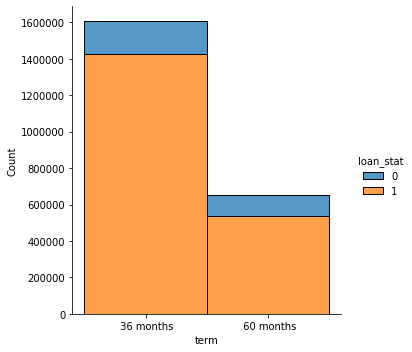

In [ ]:
sns.displot(df, x="term", hue="loan_stat", multiple="stack")

### Grades

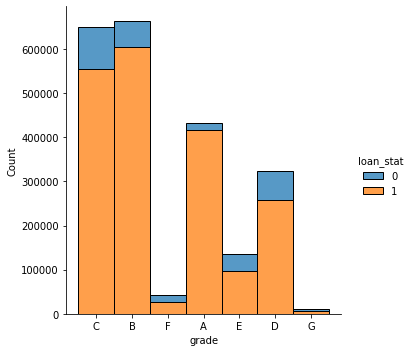

In [ ]:
sns.displot(df, x="grade", hue="loan_stat", multiple="stack")

From the graph above, we see that more people have the 36 month loan term than the 60 month loan term. Interestingly, the number of 'bad' loans are approximately the same in both terms. This tells us that the rate of bad loans is higher for loans with a 60 month term. 

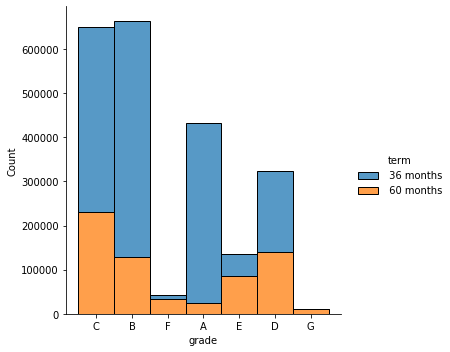

In [ ]:
sns.displot(df, x="grade", hue="term", multiple="stack")

From this chart alone, I would suggest to not invest in loans of grade F or G. There aren't that many and the risk is too high.

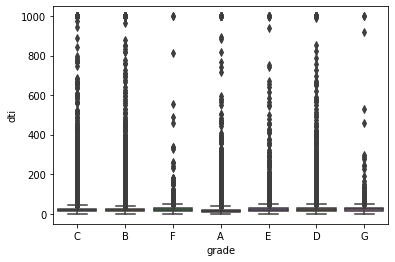

In [ ]:
sns.boxplot(x="grade", y="dti", data=df)

The boxplots above show that the dti's of accepted loans are around the same accross grades. 